In [1]:
import sacc
import numpy as np
import matplotlib.pyplot as plt

# Read SACC files

This notebook illustrates how to read and interpret data from a SACC file.
We will read the BK15 data we wrote into SACC format in SACC_write.ipynb (so run that notebook first!).

Reading the file is as simple as:

In [2]:
# First, read data
s = sacc.Sacc.load_fits("BK15.fits")

/home/alonso/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Here are some examples of how to cut the data. There are lots of different slice-and-dice functions in sacc, from very convenient to very generic. Have a look at the documentation of `sacc/sacc.py`.

### E.g. 1: keep only the BB correlations
This will drop all other elements of the data vector and the corresponding elements of the covariance matrix.

In [3]:
s.keep_selection('cl_bb')

### E.g. 2: removing things
For instance, let's remove all multipoles larger than 400 (in this case this won't remove anything, since all power spectra are only given for ell<~300).

Note that you can use the syntax `tag__gt=X` or `tag__lt=Y` to impose scale cuts on a given scale-like tag (we're using it for `tag==ell`, but it could be something else).

In [4]:
s.remove_selection(ell__gt=400)

/home/alonso/.local/lib/python3.6/site-packages/sacc-0.1.0-py3.6.egg/sacc/sacc.py:340: UserWarning: Empty index selected


### Accessing the data vector and covariance
At this point, we can access the full data vector or covariance matrix as:

In [5]:
data_vector = s.mean
covariance = s.covariance.covmat
print(data_vector.shape)
print(covariance.shape)

(702,)
(702, 702)


### Accessing the different power spectra

Now let's do some plotting. 
We will use `get_tracer_combinations` to loop through all cross-correlations. 
We will then use `get_ell_cl` to read off the corresponding power spectra.

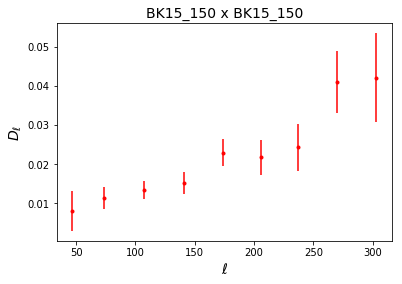

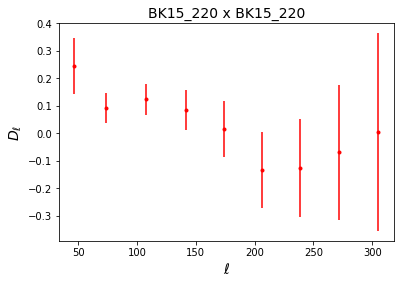

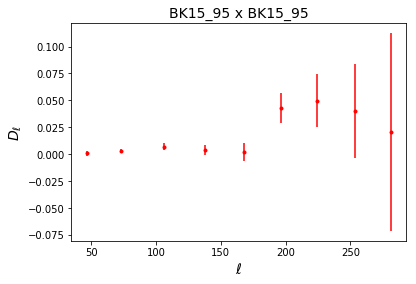

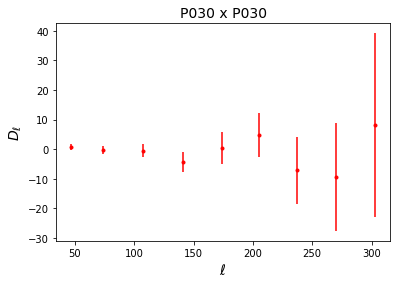

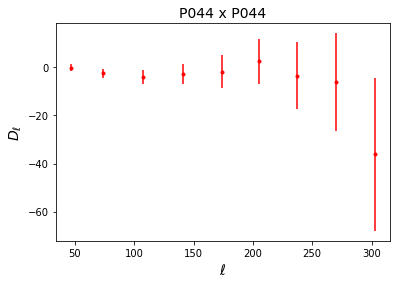

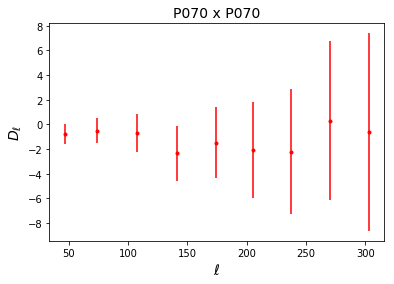

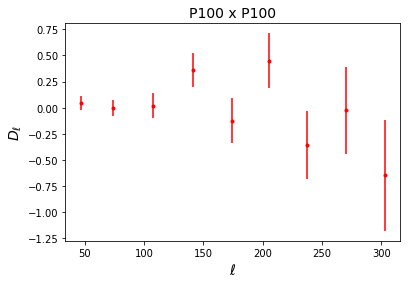

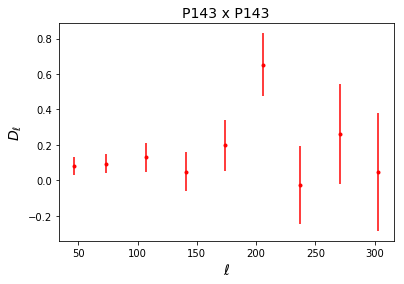

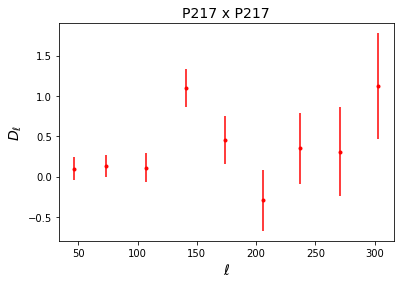

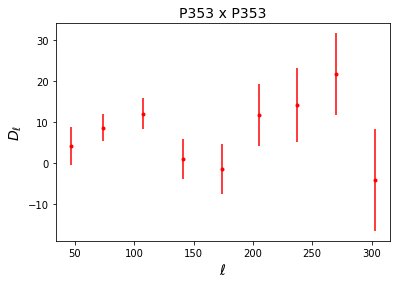

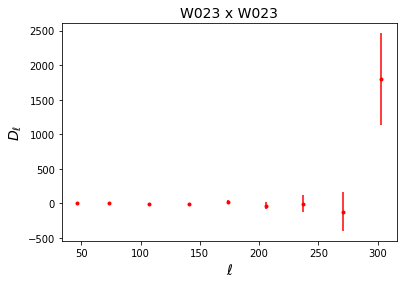

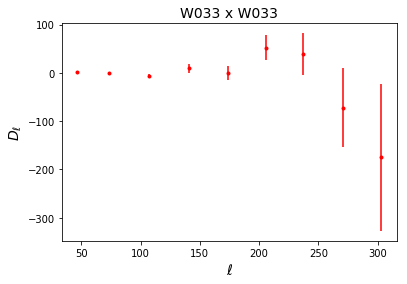

In [6]:
for b1, b2 in s.get_tracer_combinations():
    l, cl, cov = s.get_ell_cl('cl_bb', b1, b2, return_cov=True)
    # Let's plot only the auto-correlations. Otherwise it gets unwieldy
    if b1==b2:
        plt.figure()
        plt.title(b1+" x "+b2,fontsize=14)
        plt.errorbar(l, cl, yerr=np.sqrt(np.diag(cov)), fmt='r.')
        plt.xlabel('$\\ell$',fontsize=14)
        plt.ylabel('$D_\\ell$',fontsize=14)
plt.show()